# PROJECT 18: PREDICT THE  FEE OF DOCTOR

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read train and test data
dftr =pd.read_excel('Final_Train.xlsx')
dfte=pd.read_excel('Final_Test.xlsx')

In [3]:
#lets check the shape of train and test data
print('train data = ',dftr.shape)
print('test data = ',dfte.shape)
#seems test data has one less column and it should be the fee column as it is the target

train data =  (5961, 7)
test data =  (1987, 6)


In [4]:
#Lets check the first five rows of train data
dftr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#Lets check the first five rows of test data
dfte.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
#Lets check the null values in train data
dftr.isnull().sum()
#There are lots of missing values in  rating and miscellalnious and few in  place

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

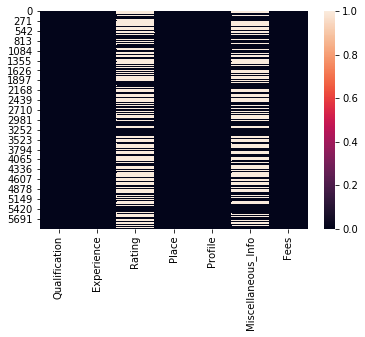

In [7]:
#Lets check the heatmap to see the missing values
sns.heatmap(dftr.isnull())

In [8]:
#Lets see the missing values in test data
dfte.isnull().sum()
# same case as with training data i.e. Large no. of missing values in rating and miscellaneos and few in place

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

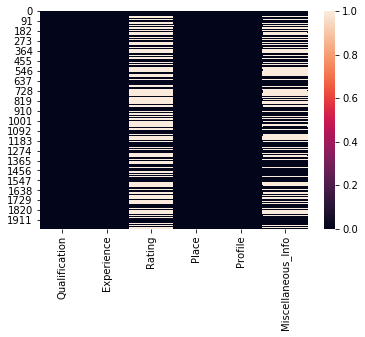

In [9]:
#Lets check the heatmap to see the missing values in test data
sns.heatmap(dfte.isnull())

In [10]:
#Lets see the rating colum
dftr['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
64%       2
63%       2
55%       2
62%       2
33%       2
53%       1
36%       1
48%       1
65%       1
7%        1
47%       1
58%       1
40%       1
45%       1
Name: Rating, dtype: int64

In [11]:
#Lets replace the missing values by some value not available in thr columns
#we are replace missing value =-99
dftr['Rating'].fillna('-99%',inplace=True)
dfte['Rating'].fillna('-99%',inplace=True)

In [12]:
#Lets check the unique values  and their counts
dftr['Rating'].value_counts()

-99%    3302
100%     684
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
92%       66
90%       66
91%       60
89%       42
88%       41
85%       27
82%       23
83%       21
86%       21
80%       19
77%       16
87%       14
79%       13
84%       13
81%       12
67%       12
76%        9
71%        9
73%        8
75%        8
60%        7
74%        7
78%        6
56%        5
68%        5
70%        4
69%        4
72%        3
57%        3
55%        2
64%        2
62%        2
63%        2
33%        2
45%        1
53%        1
48%        1
36%        1
47%        1
58%        1
65%        1
40%        1
7%         1
Name: Rating, dtype: int64

In [13]:
#Lets extract the number before percentage in rating column
sep=dftr['Rating'].str.split('%',expand=True)
sep1=dfte['Rating'].str.split('%',expand=True)
dftr['num_rate'] =sep[0]
dfte['num_rate']=sep1[0]


In [14]:
#But the num_rate is object,lets change it into integer
dftr['num_rating'] =dftr['num_rate'].astype('int64')
dfte['num_rating'] =dftr['num_rate'].astype('int64')

In [15]:
#lets create bins for num_rating
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
dftr["num_rating"] = pd.cut(dftr["num_rating"],bins=bins,labels=labels,include_lowest=True)
dfte["num_rating"] = pd.cut(dfte["num_rating"],bins=bins,labels=labels,include_lowest=True)


In [16]:
#Lets drop the num_rate  and ratingscolum as the information present in it has been extracted
dftr.drop(['num_rate','Rating'],axis=1,inplace=True)
dfte.drop(['num_rate','Rating'],axis=1,inplace=True)


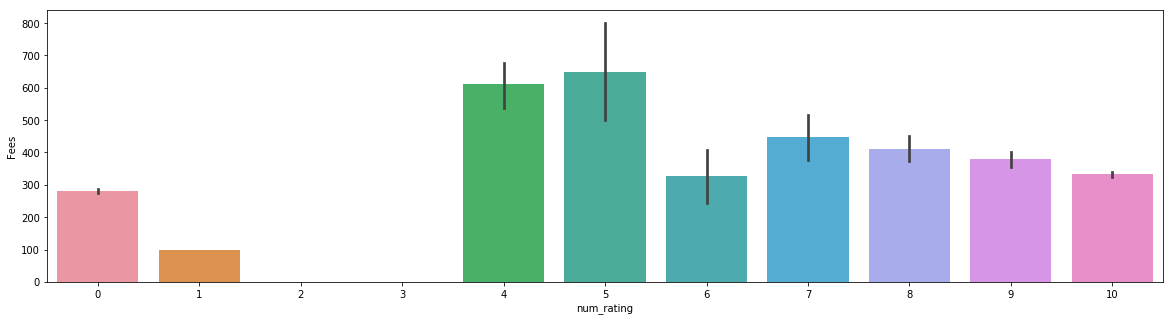

In [17]:
#lets explore the relation between number of fee and rating
plt.figure(figsize=(20,5))
sns.barplot(x='num_rating',y='Fees',data=dftr)


In [18]:
#Lets confirm the drop step in training data
dftr.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees,num_rating
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,10
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,10
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,10


In [19]:
#Lets confirm the drop step in test data
dfte.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,num_rating
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine,NaN,10
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist,NaN,10
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,NaN,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,10


In [20]:
#Lets now extract numeric data from experience
new = dftr['Experience'].str.split(' ',expand=True)
new1 = dftr['Experience'].str.split(' ',expand=True)

In [21]:
#Lets convert them into integer
dftr['Exp'] =new[0].astype('int64')
dfte['Exp'] =new1[0].astype('int64')

In [22]:
#Lets check the datatype of exp
print (dftr['Exp'].dtypes)
print(dfte['Exp'].dtypes)

int64
int64


In [23]:
#Lets check the first 5 rows again of training data
dftr.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees,num_rating,Exp
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,10,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,10,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,9
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,12
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,10,20


In [24]:
#Lets check the first 5 rows again of test data
dfte.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,num_rating,Exp
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine,NaN,10,24
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist,NaN,10,12
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,9
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,12
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,10,20


In [25]:
#As the information from experience has been extracted into exp column, lets drop it
dftr.drop('Experience',axis=1,inplace=True)
dfte.drop('Experience',axis=1,inplace=True)

In [26]:
#Lets confirm the drop of experience column in train data
dftr.head()

,Qualification,Place,Profile,Miscellaneous_Info,Fees,num_rating,Exp
0,"BHMS, MD - Homeopathy","Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,10,24
1,"BAMS, MD - Ayurveda Medicine","Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,10,12
2,"MBBS, MS - Otorhinolaryngology","Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,9
3,"BSc - Zoology, BAMS","Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,12
4,BAMS,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,10,20


In [27]:
#Lets confirm the drop of experience column in test data
dfte.head()

,Qualification,Place,Profile,Miscellaneous_Info,num_rating,Exp
0,MBBS,"Ghatkopar East, Mumbai",General Medicine,NaN,10,24
1,"MBBS, Diploma in Otorhinolaryngology (DLO)","West Marredpally, Hyderabad",ENT Specialist,NaN,10,12
2,"MBBS, DDVL","KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,9
3,BAMS,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,12
4,"BDS, MDS - Conservative Dentistry & Endodontics","Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,10,20


In [28]:
#If we see the Miscellaneous_Info  properly, it contains rating,number of ,feedbacks, fee, locality and City
#The info regarding rating,fee,locality and city are already available in other columns
#Only one info regarding the number of feedbacks is not available elsewhere, we can extract that 
#But the data is not in a proper format
# so lets drop the column Miscellaneous infor
dftr.drop('Miscellaneous_Info',axis=1,inplace=True)
dfte.drop('Miscellaneous_Info',axis=1,inplace=True)

In [29]:
#Lets check the missing values in train data now
dftr.isnull().sum()

Qualification     0
Place            25
Profile           0
Fees              0
num_rating        0
Exp               0
dtype: int64

In [30]:
#Lets check the missing values in test data
dfte.isnull().sum()

Qualification    0
Place            6
Profile          0
num_rating       0
Exp              0
dtype: int64

In [31]:
#lETS DEAL WITH THE MISSING VALUE IN PLACE COLUMN
# WE CAN REPLACE THE MISSING VALUES WITH MODE OF THE DATA BUT HERE DIFFERENT PLACE MAY BE THERE IN DIFFERENT CITY
# AS THE PLACE AND LOCALITY ARE NOT KNOWN WITH UNKNOWN
dftr['Place'].fillna('Unknown,Unknown',inplace=True)
dfte['Place'].fillna('Unknown,Unknown',inplace=True)

In [32]:
#Lets extract the locality and city info from Place column
plc = dftr['Place'].str.split(',',expand=True)
plc1 =dfte['Place'].str.split(',',expand=True)

In [33]:
#Lets create localtiy and city colums
dftr['Locality'] =plc[0]
dftr['city']=plc[1]
dfte['Locality'] =plc1[0]
dfte['city']=plc1[1]

In [34]:
#Lets check if there is  missing values in train data
dftr.isnull().sum()

Qualification    0
Place            0
Profile          0
Fees             0
num_rating       0
Exp              0
Locality         0
city             1
dtype: int64

In [35]:
#There is only one row which is null
#Lets drop this
dftr.dropna(inplace=True)

In [36]:
#Lets check again the missing value
dftr.isnull().sum()

Qualification    0
Place            0
Profile          0
Fees             0
num_rating       0
Exp              0
Locality         0
city             0
dtype: int64

In [37]:
##Lets check if there is  missing values in test data
dfte.isnull().sum()

Qualification    0
Place            0
Profile          0
num_rating       0
Exp              0
Locality         0
city             0
dtype: int64

In [38]:
#As the locality and city information has been extracted from place column, lets drop it
dftr.drop('Place',axis=1,inplace=True)
dfte.drop('Place',axis=1,inplace=True)

In [39]:
#Lets check the head again of train data
dftr.head()

,Qualification,Profile,Fees,num_rating,Exp,Locality,city
0,"BHMS, MD - Homeopathy",Homeopath,100,10,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,350,10,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,300,0,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",Ayurveda,250,0,12,Bannerghatta Road,Bangalore
4,BAMS,Ayurveda,250,10,20,Keelkattalai,Chennai


In [40]:
#Lets check the head again of test data
dfte.head()

,Qualification,Profile,num_rating,Exp,Locality,city
0,MBBS,General Medicine,10,24,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",ENT Specialist,10,12,West Marredpally,Hyderabad
2,"MBBS, DDVL",Dermatologists,0,9,KK Nagar,Chennai
3,BAMS,Ayurveda,0,12,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",Dentist,10,20,Kanakpura Road,Bangalore


In [41]:
#LETS EXPLORE THE QUALIFICATION COLUMN
dftr['Qualification'].nunique()

1420

In [42]:
#Lets extract the information from qualification column 
qual = dftr['Qualification'].str.split(',')
qual1=dfte['Qualification'].str.split(',')

In [43]:
#Lets extract the number of qualification of each doctor
dftr['No.of Qual']=qual.apply(lambda x:len(x))
dfte['No.of Qual']=qual1.apply(lambda x:len(x))

In [44]:
#Lets check the first five rows
dftr.head()

,Qualification,Profile,Fees,num_rating,Exp,Locality,city,No.of Qual
0,"BHMS, MD - Homeopathy",Homeopath,100,10,24,Kakkanad,Ernakulam,2
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,350,10,12,Whitefield,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,300,0,9,Mathikere - BEL,Bangalore,2
3,"BSc - Zoology, BAMS",Ayurveda,250,0,12,Bannerghatta Road,Bangalore,2
4,BAMS,Ayurveda,250,10,20,Keelkattalai,Chennai,1


In [45]:
#Lets check the first five rows
dfte.head()

,Qualification,Profile,num_rating,Exp,Locality,city,No.of Qual
0,MBBS,General Medicine,10,24,Ghatkopar East,Mumbai,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",ENT Specialist,10,12,West Marredpally,Hyderabad,2
2,"MBBS, DDVL",Dermatologists,0,9,KK Nagar,Chennai,2
3,BAMS,Ayurveda,0,12,New Ashok Nagar,Delhi,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",Dentist,10,20,Kanakpura Road,Bangalore,2


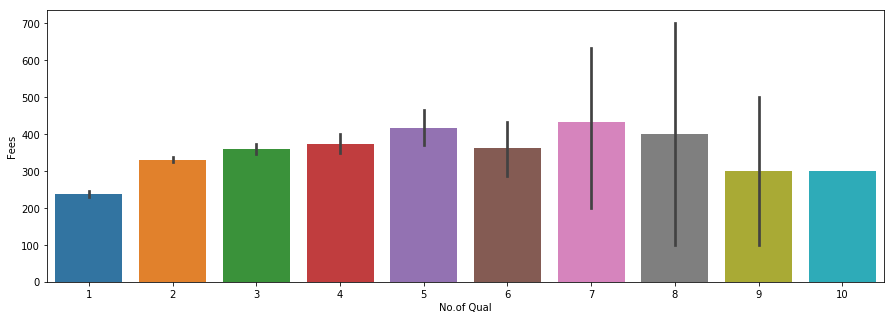

In [46]:
#Lets explore the relation betweeen fee and number of qualifications
plt.figure(figsize=(15,5))
sns.barplot(x='No.of Qual',y='Fees',data=dftr)

In [47]:
#we can see that doctor with  only 1 qualification has lowest fee
#The doctor with 7 qualifications has highest fee

In [48]:
#Lets explore qualification a little more
quali = dftr['Qualification'].str.split(",",expand=True)
quali1= dfte['Qualification'].str.split(",",expand=True)

In [49]:
#Lets check first five rows of qualification
quali.head()
#in train data doctors are having upto 10 qualifications

,0,1,2,3,4,5,6,7,8,9
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None


In [50]:
#Lets check first five rows of qualification in test data
quali1.head()
#in test data, doctors have upto 17 qualifications

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,MBBS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,MBBS,Diploma in Otorhinolaryngology (DLO),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,MBBS,DDVL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,BDS,MDS - Conservative Dentistry & Endodontics,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [51]:
#Lets check unique values in each column of train data
unique=[]
for i in quali.columns:
    unique.append(quali[i].nunique())
print(unique)

[151, 426, 406, 212, 95, 32, 12, 6, 4, 1]


In [52]:
#Lets check unique values in each column of test data
unique=[]
for i in quali1.columns:
    unique.append(quali1[i].nunique())
print(unique)

[87, 243, 195, 90, 35, 8, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [53]:
#we can see that most of the  unique qualifications are in starting 4 columns 
#Lets select only four columns of qualification
dftr['qual_1'] = quali[0]
dftr['qual_2'] = quali[1]
dftr['qual_3'] = quali[2]
dftr['qual_4'] = quali[3]
dfte['qual_1'] = quali1[0]
dfte['qual_2'] = quali1[1]
dfte['qual_3'] = quali1[2]
dfte['qual_4'] = quali1[3]

In [54]:
#Lets check the first five rows of  training data
dftr.head()

,Qualification,Profile,Fees,num_rating,Exp,Locality,city,No.of Qual,qual_1,qual_2,qual_3,qual_4
0,"BHMS, MD - Homeopathy",Homeopath,100,10,24,Kakkanad,Ernakulam,2,BHMS,MD - Homeopathy,None,None
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,350,10,12,Whitefield,Bangalore,2,BAMS,MD - Ayurveda Medicine,None,None
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,300,0,9,Mathikere - BEL,Bangalore,2,MBBS,MS - Otorhinolaryngology,None,None
3,"BSc - Zoology, BAMS",Ayurveda,250,0,12,Bannerghatta Road,Bangalore,2,BSc - Zoology,BAMS,None,None
4,BAMS,Ayurveda,250,10,20,Keelkattalai,Chennai,1,BAMS,None,None,None


In [55]:
#Lets check the first five rows of  test data
dfte.head()

,Qualification,Profile,num_rating,Exp,Locality,city,No.of Qual,qual_1,qual_2,qual_3,qual_4
0,MBBS,General Medicine,10,24,Ghatkopar East,Mumbai,1,MBBS,None,None,None
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",ENT Specialist,10,12,West Marredpally,Hyderabad,2,MBBS,Diploma in Otorhinolaryngology (DLO),None,None
2,"MBBS, DDVL",Dermatologists,0,9,KK Nagar,Chennai,2,MBBS,DDVL,None,None
3,BAMS,Ayurveda,0,12,New Ashok Nagar,Delhi,1,BAMS,None,None,None
4,"BDS, MDS - Conservative Dentistry & Endodontics",Dentist,10,20,Kanakpura Road,Bangalore,2,BDS,MDS - Conservative Dentistry & Endodontics,None,None


In [56]:
#Lets replace the missing values in qual columns
dftr['qual_1'].fillna('xxx',inplace=True)
dftr['qual_2'].fillna('yyy',inplace=True)
dftr['qual_3'].fillna('zzz',inplace=True)
dftr['qual_4'].fillna('www',inplace=True)
dfte['qual_1'].fillna('xxx',inplace=True)
dfte['qual_2'].fillna('yyy',inplace=True)
dfte['qual_3'].fillna('zzz',inplace=True)
dfte['qual_4'].fillna('www',inplace=True)

In [57]:
#Lets drop the Qualification colum
dftr.drop('Qualification',axis=1,inplace=True)
dfte.drop('Qualification',axis=1,inplace=True)

In [58]:
#Lets create a copy of train and test data
df=dftr.copy()
dft=dfte.copy()

In [59]:
#Lets see the profile in test data
dfte['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [60]:
#Lets see the profile in train data
dftr['Profile'].value_counts()

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

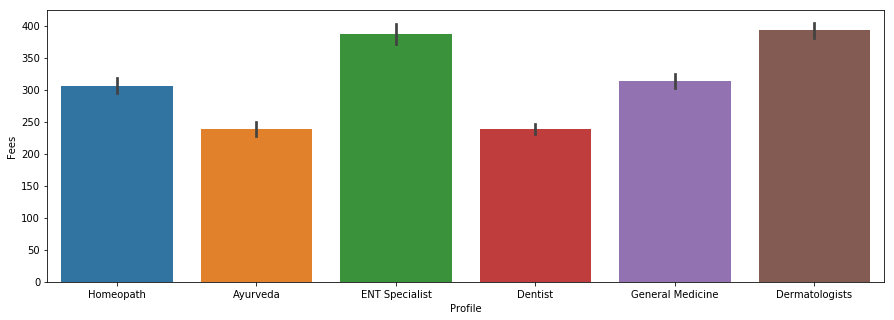

In [61]:
#Lets explore the relation between Profile and fee
plt.figure(figsize=(15,5))
sns.barplot(x='Profile',y='Fees',data=dftr)

In [62]:
# As expected we can see that different specialist charge different fee  
#As expected We can see that Aurveda and Dentist normally have normally lower fee then other specilization
#Highest fee is charged  by ENT Specialist and Dermatologist

In [63]:
#There are ten cities in training data
dftr['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: city, dtype: int64

In [64]:
#There are just 9 cities in test data
dfte['city'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: city, dtype: int64

In [65]:
#By visulization we encountered that sector 5 is in dwarika delhi, so replacing it by delhi
dftr['city'] = dftr['city'].apply(lambda x: ' Delhi' if x==" Sector 5" else x)
   

In [66]:
#Now both have same number of unique values
dftr['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
Name: city, dtype: int64

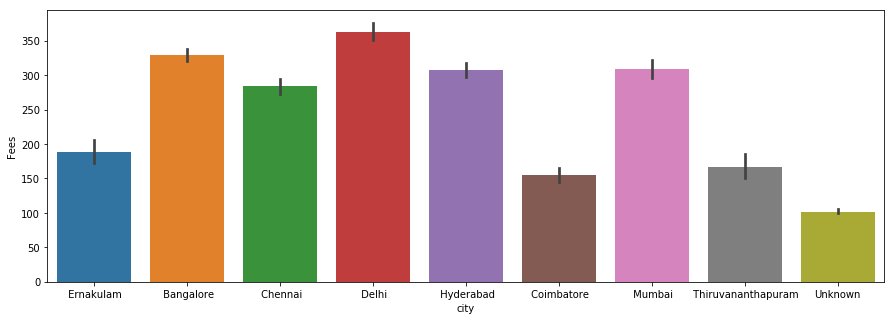

In [67]:
#Lets explore the relation between city and fee
plt.figure(figsize=(15,5))
sns.barplot(x='city',y='Fees',data=dftr)

In [68]:
# We can see that fee varies according to city
#Highest fee is in Delhi
#Infact metro cities normally have high fee

In [69]:
#Lets create dummy variables for profile and city
dftr = pd.get_dummies(dftr,columns=['Profile', 'city'],prefix=['Prof','City'],drop_first=True)
dfte = pd.get_dummies(dfte,columns=['Profile', 'city'],prefix=['Prof','City'],drop_first=True)

In [70]:
#Lets label encode qual and locality features
from sklearn.preprocessing import LabelEncoder
encode = ['qual_1','qual_2','qual_3','qual_4','Locality','num_rating']
le=LabelEncoder()
for i in encode:
    dftr[i]=le.fit_transform(dftr[i])
    dfte[i]=le.fit_transform(dfte[i])


In [71]:
#Lets check the traning data
dftr.head()

,Fees,num_rating,Exp,Locality,No.of Qual,qual_1,qual_2,qual_3,qual_4,Prof_Dentist,...,Prof_General Medicine,Prof_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,100,8,24,296,2,8,252,406,212,0,...,0,1,0,0,0,1,0,0,0,0
1,350,8,12,856,2,5,241,406,212,0,...,0,0,0,0,0,0,0,0,0,0
2,300,0,9,452,2,79,334,406,212,0,...,0,0,0,0,0,0,0,0,0,0
3,250,0,12,68,2,12,7,406,212,0,...,0,0,0,0,0,0,0,0,0,0
4,250,8,20,335,1,5,426,406,212,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
#Lets check the test data
dfte.head()


,num_rating,Exp,Locality,No.of Qual,qual_1,qual_2,qual_3,qual_4,Prof_Dentist,Prof_Dermatologists,...,Prof_General Medicine,Prof_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,7,24,142,1,48,243,195,90,0,0,...,1,0,0,0,0,0,0,1,0,0
1,7,12,578,2,48,79,195,90,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,9,212,2,48,28,195,90,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,12,373,1,1,243,195,90,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7,20,231,2,2,157,195,90,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Now all the data is in numeric form

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003FDAD1EAC8>,
      dtype=object)

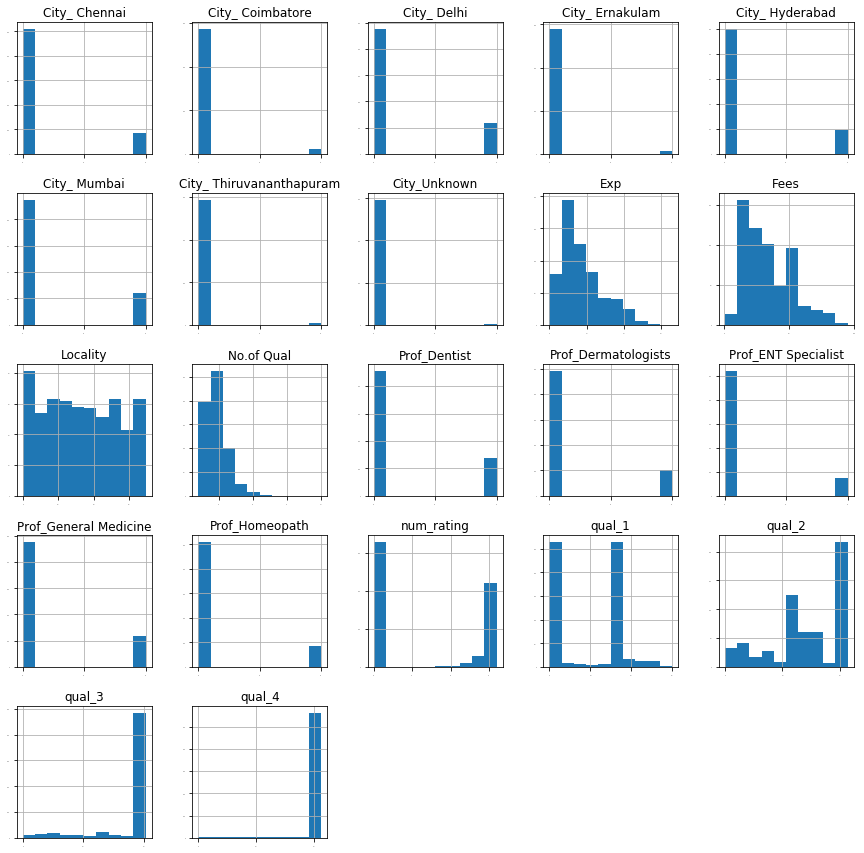

In [74]:
#Lets check the distribution of  train data
dftr.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))
# we can see the skewness in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003FDC21EA90>,
      dtype=object)

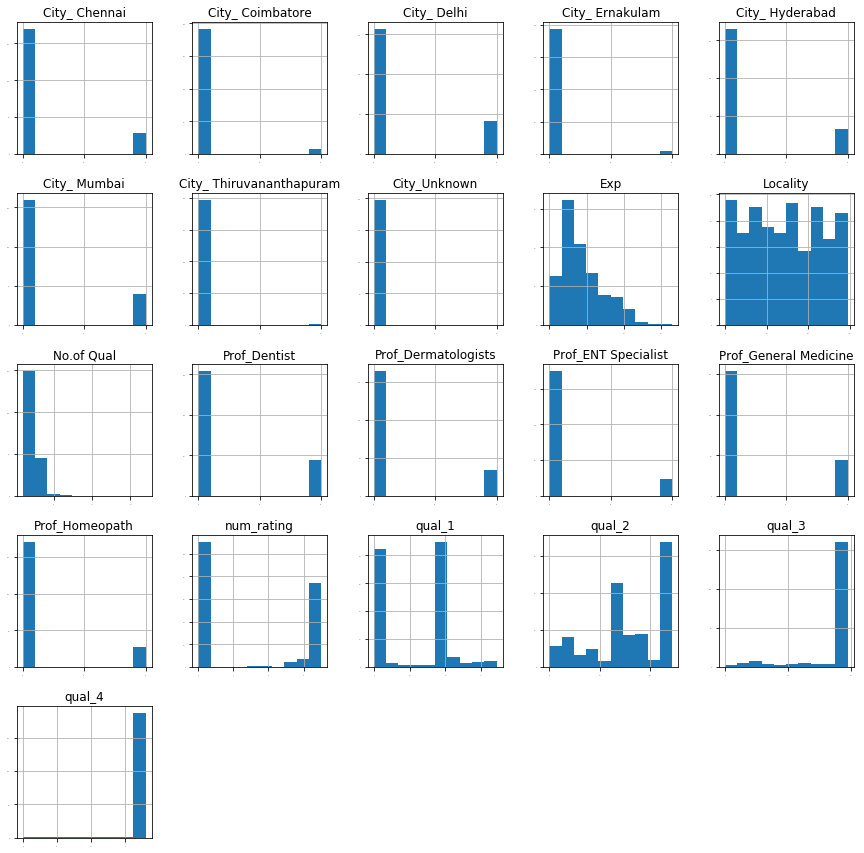

In [75]:
#Lets check the distribution of  test data
dfte.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))
# we can see the skewness in data

Fees             AxesSubplot(0.125,0.125;0.227941x0.755)
Exp           AxesSubplot(0.398529,0.125;0.227941x0.755)
No.of Qual    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

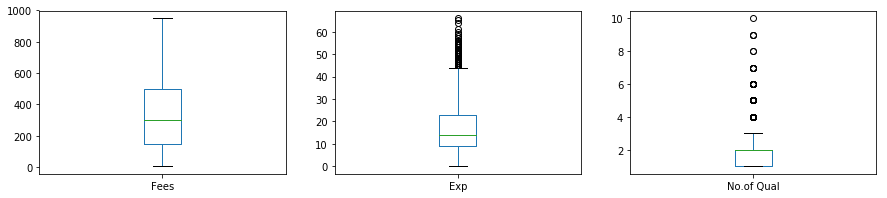

In [76]:
#Lets plot the box plot of each numeric variable in train data
dftr[['Fees','Exp','No.of Qual']].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(15,3))
# we can see the  presence of outliers in few variables, we will deal with them soon

Exp              AxesSubplot(0.125,0.125;0.352273x0.755)
No.of Qual    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

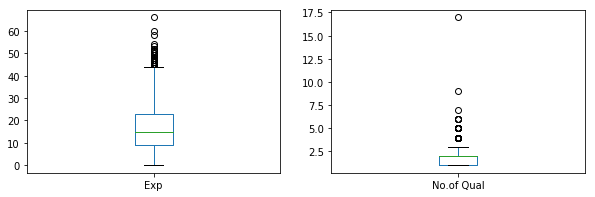

In [77]:
#Lets plot the box plot of each numeric variable in test data
dfte[['Exp','No.of Qual']].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False, figsize=(10,3))
# we can see the  presence of outliers in few variables, we will deal with them soon

In [78]:
#Lets check the skewness in  train data
dftr.skew()

Fees                         0.751676
num_rating                   0.251484
Exp                          0.991306
Locality                     0.109281
No.of Qual                   1.433475
qual_1                       0.067980
qual_2                      -0.611113
qual_3                      -2.237435
qual_4                      -4.946729
Prof_Dentist                 1.255391
Prof_Dermatologists          1.724943
Prof_ENT Specialist          2.308384
Prof_General Medicine        1.525516
Prof_Homeopath               2.058365
City_ Chennai                2.034779
City_ Coimbatore             4.815787
City_ Delhi                  1.509586
City_ Ernakulam              5.999893
City_ Hyderabad              1.859754
City_ Mumbai                 1.465419
City_ Thiruvananthapuram     8.145573
City_Unknown                15.346751
dtype: float64

In [79]:
#Lets reduce positive skewness in train data 
for col in dftr.columns:                                      
    if dftr.skew().loc[col]>0.55:
        dftr[col]=np.log1p(dftr[col])


In [80]:
#Lets check the skewness  again in train  data
dftr.skew()

Fees                        -0.298146
num_rating                   0.251484
Exp                         -0.894938
Locality                     0.109281
No.of Qual                   0.393419
qual_1                       0.067980
qual_2                      -0.611113
qual_3                      -2.237435
qual_4                      -4.946729
Prof_Dentist                 1.255391
Prof_Dermatologists          1.724943
Prof_ENT Specialist          2.308384
Prof_General Medicine        1.525516
Prof_Homeopath               2.058365
City_ Chennai                2.034779
City_ Coimbatore             4.815787
City_ Delhi                  1.509586
City_ Ernakulam              5.999893
City_ Hyderabad              1.859754
City_ Mumbai                 1.465419
City_ Thiruvananthapuram     8.145573
City_Unknown                15.346751
dtype: float64

In [81]:
#Lets reduce negative skewness in train data
for col in dftr.columns:                                      
    if dftr.skew().loc[col]<-0.55:
        dftr[col]=np.power(dftr[col],2)


In [82]:
#Lets check the skewness in  test data
dfte.skew()

num_rating                   0.279966
Exp                          0.925722
Locality                     0.036802
No.of Qual                   2.684026
qual_1                       0.013098
qual_2                      -0.458845
qual_3                      -2.177083
qual_4                      -5.039675
Prof_Dentist                 1.339264
Prof_Dermatologists          1.752626
Prof_ENT Specialist          2.365989
Prof_General Medicine        1.328775
Prof_Homeopath               2.083705
City_ Chennai                2.024439
City_ Coimbatore             5.045856
City_ Delhi                  1.426066
City_ Ernakulam              6.203118
City_ Hyderabad              1.781316
City_ Mumbai                 1.534586
City_ Thiruvananthapuram    10.680036
City_Unknown                18.129143
dtype: float64

In [83]:
#Lets reduce positive skewness in test data 
for col in dfte.columns:                                      
    if dfte.skew().loc[col]>0.55:
        dfte[col]=np.log1p(dfte[col])

In [84]:
#Lets check the skewness again
dfte.skew()

num_rating                   0.279966
Exp                         -0.993708
Locality                     0.036802
No.of Qual                   0.367794
qual_1                       0.013098
qual_2                      -0.458845
qual_3                      -2.177083
qual_4                      -5.039675
Prof_Dentist                 1.339264
Prof_Dermatologists          1.752626
Prof_ENT Specialist          2.365989
Prof_General Medicine        1.328775
Prof_Homeopath               2.083705
City_ Chennai                2.024439
City_ Coimbatore             5.045856
City_ Delhi                  1.426066
City_ Ernakulam              6.203118
City_ Hyderabad              1.781316
City_ Mumbai                 1.534586
City_ Thiruvananthapuram    10.680036
City_Unknown                18.129143
dtype: float64

In [85]:
#Lets reduce negative skewness in test data
for col in dfte.columns:                                      
    if dfte.skew().loc[col]<-0.55:
        dfte[col]=np.power(dfte[col],2)


In [86]:
#Lets check the skewness again
dfte.skew()

num_rating                   0.279966
Exp                          0.137517
Locality                     0.036802
No.of Qual                   0.367794
qual_1                       0.013098
qual_2                      -0.458845
qual_3                      -1.866031
qual_4                      -4.450106
Prof_Dentist                 1.339264
Prof_Dermatologists          1.752626
Prof_ENT Specialist          2.365989
Prof_General Medicine        1.328775
Prof_Homeopath               2.083705
City_ Chennai                2.024439
City_ Coimbatore             5.045856
City_ Delhi                  1.426066
City_ Ernakulam              6.203118
City_ Hyderabad              1.781316
City_ Mumbai                 1.534586
City_ Thiruvananthapuram    10.680036
City_Unknown                18.129143
dtype: float64

In [87]:
# Lets remove the outliers if any
from scipy.stats import zscore
colm=dftr[['Fees','Exp','No.of Qual']]
z_score =abs(zscore(colm))
dfx = dftr.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dftr.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (5960, 22)
The shape of dataframe after removing outliers is = (5917, 22)


In [88]:
#Now lets seperate features and target
xtrain=dfx.drop('Fees',axis=1)
ytrain=dfx[['Fees']]

In [89]:
#Lets see the first five rows of features
xtrain.head()

,num_rating,Exp,Locality,No.of Qual,qual_1,qual_2,qual_3,qual_4,Prof_Dentist,Prof_Dermatologists,...,Prof_General Medicine,Prof_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,8,10.361162,296,1.098612,8,63504,164836,44944,0.0,0.0,...,0.0,0.693359,0.000000,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
1,8,6.578965,856,1.098612,5,58081,164836,44944,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0,5.301898,452,1.098612,79,111556,164836,44944,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,6.578965,68,1.098612,12,49,164836,44944,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,8,9.269117,335,0.693147,5,181476,164836,44944,0.0,0.0,...,0.0,0.000000,0.693359,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [90]:
#Lets see the first five rows of target
ytrain.head()

,Fees
0,4.615121
1,5.860786
2,5.707110
3,5.525453
4,5.525453


In [91]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [92]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [93]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, xtrain, ytrain, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.369828 (0.014507)
Lasso: -0.454399 (0.014993)
Ridge: -0.369827 (0.014507)
EN: -0.454399 (0.014993)
DT: -0.655186 (0.027976)
SVR: -0.384352 (0.023220)
KNN: -0.419605 (0.014565)


In [94]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.184859 (0.018225)
Lasso: -0.001524 (0.001662)
Ridge: 0.184861 (0.018226)
EN: -0.001524 (0.001662)
DT: -0.445936 (0.084539)
SVR: 0.152927 (0.041534)
KNN: 0.074791 (0.027641)


In [95]:
#Lets create a comparison
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,Ridge,0.184861,-0.369827
0,LR,0.184859,-0.369828
5,SVR,0.152927,-0.384352
6,KNN,0.074791,-0.419605
1,Lasso,-0.001524,-0.454399
3,EN,-0.001524,-0.454399
4,DT,-0.445936,-0.655186


In [96]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [97]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, xtrain, ytrain, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -0.395373 (0.019552)
ADC: -0.389931 (0.015571)
GBC: -0.348762 (0.016163)


In [98]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, xtrain, ytrain, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.128513 (0.034171)
ADC: 0.140702 (0.011877)
GBC: 0.231352 (0.023669)


In [99]:
#Lets see the comparison between ensemble techniques
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.231352,-0.348762
1,ADC,0.140702,-0.389931
0,RF,0.128513,-0.395373


In [100]:
#Lets see the comparison between all the basic and ensemble techniques
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.231352,-0.348762
2,Ridge,0.184861,-0.369827
0,LR,0.184859,-0.369828
5,SVR,0.152927,-0.384352
1,ADC,0.140702,-0.389931
0,RF,0.128513,-0.395373
6,KNN,0.074791,-0.419605
1,Lasso,-0.001524,-0.454399
3,EN,-0.001524,-0.454399
4,DT,-0.445936,-0.655186


In [101]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [102]:
#Lets try to check if  cross val performance of GBC can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(xtrain)
scXtrain = scaler.transform(xtrain)

param_grid = {'n_estimators': [50,100,200,300],'learning_rate': [0.05,0.1,0.2],'max_depth': [2,3,4],'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2]}
mod = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='r2', cv=kfoldx,n_jobs=-1,verbose=True)
grid_result = grid.fit(scXtrain, ytrain)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  9.8min finished


In [103]:
#Lets see the best score
grid_result.best_score_
# we can see the r2 score has been improved from 0.2313 to 0.2502

0.2502941488239198

In [104]:
#Lets see the best parameters
grid_result.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [106]:
#Lets see the best estimator
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
# lETS CHECK ITS KFOLD CROSS VAL NMSE AND R2 SCORE
modelf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=200, n_iter_no_change=None, presort='auto',random_state=5, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)

print('KFOLD Cross val nmse = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="neg_mean_squared_error").mean())
print('KFOLD Cross val R2 = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="r2").mean())

KFOLD Cross val nmse =  -0.34022569095706795
KFOLD Cross val R2 =  0.250288808642377


In [114]:
#Lets implement the model using best parameters
GBR = GradientBoostingRegressor(learning_rate=0.1,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=200, random_state=5)
sc = StandardScaler()
X_train= sc.fit_transform(xtrain)
X_test= sc.transform(dfte)
GBR.fit(X_train,ytrain)
ypred=GBR.predict(X_test)


In [115]:
#As we have taken the log1p of fee colum to reduce skewness, we have to reverse the operation to get actual predicted values
ypredx=np.expm1(ypred)

In [117]:
# Lets save the predicted result to a excel file
dfpr = pd.DataFrame(ypredx,columns=['Fees'])
dfpr.to_csv('GBF_fee_prediction.csv')

In [118]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(GBR,'GBR_FEE_PRED.pkl')

['GBR_FEE_PRED.pkl']